In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from scale.plot import plot_confusion_matrix, plot_heatmap, plot_embedding, feature_specifity
from scale.utils import read_labels
from scale.specifity import cluster_specific, mat_specificity_score
from sklearn.metrics import confusion_matrix

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100

## load data

In [5]:
ref, classes = read_labels('result/GM_Batch/GM_replicates_labels.txt')
raw = pd.read_csv('result/GM_Batch/GM_replicates.txt', sep='\t', index_col=0)
rep_1_3 = list(np.where(ref==0)[0]) + list(np.where(ref==2)[0])
y = np.array(['rep'+str(i+1) for i in ref])

## Figure S16a

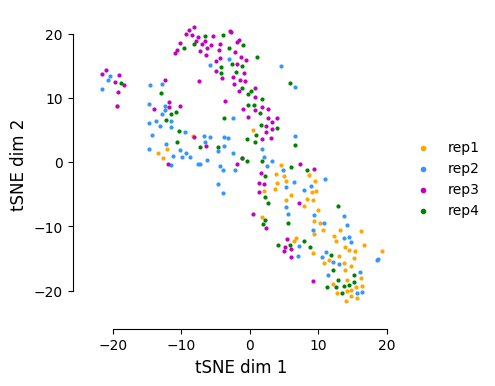

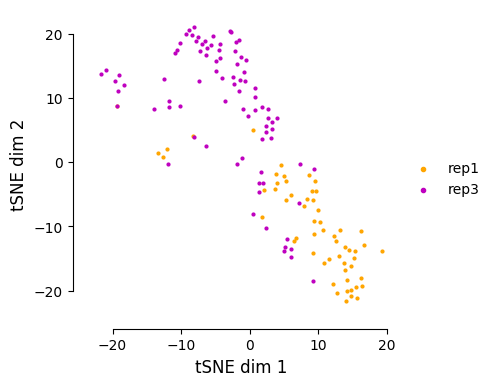

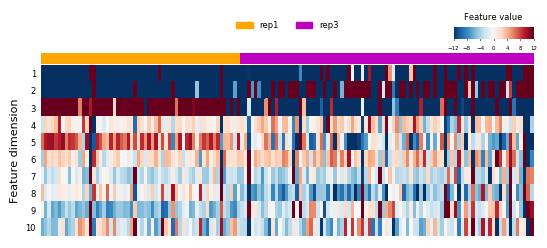

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=124)
pca_feature = pca.fit_transform(raw.T)

emb = plot_embedding(pca_feature, y, cmap=['orange', '#3396FF', 'm', 'green'], markersize=4, return_emb=True)
plot_embedding(emb, y, classes=['rep1', 'rep3'], markersize=4, cmap=['orange', 'm']) 

plot_heatmap(pd.DataFrame(pca_feature[rep_1_3].T), y[rep_1_3], cmap='RdBu_r', row_cluster=False, 
             cax_title='Feature value', yticklabels=range(1, 11),
             ylabel='Feature dimension', vmin=-12, vmax=12, figsize=(8, 3), colormap=['orange', 'm'], legend_font=6)

## Figure S16b

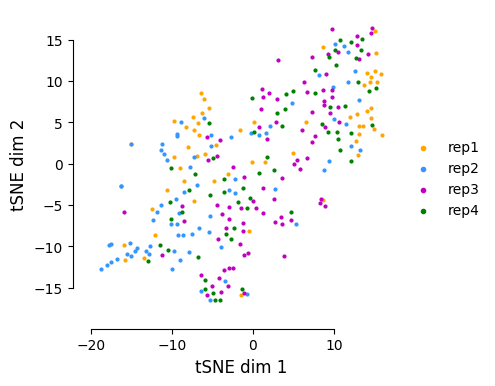

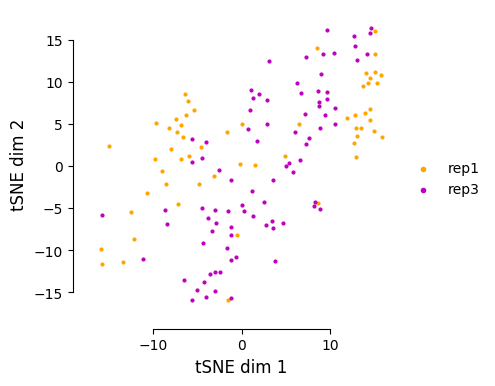

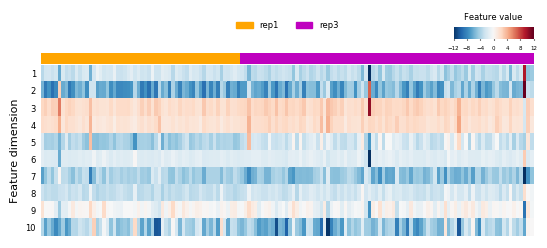

In [8]:
feature = pd.read_csv('result/GM_Batch/GM_k4/feature.txt', sep='\t', index_col=0, header=None)
emb =plot_embedding(feature, y, markersize=4, return_emb=True, cmap=['orange', '#3396FF', 'm', 'green'])

plot_embedding(emb, y, classes=['rep1', 'rep3'], cmap=['orange', 'm'], markersize=4)

plot_heatmap(feature.iloc[rep_1_3].T, y[rep_1_3], cmap='RdBu_r', row_cluster=False, 
             cax_title='Feature value', yticklabels=range(1, 11),
             ylabel='Feature dimension', vmin=-12, vmax=12, figsize=(8, 3), colormap=['orange', 'm'], legend_font=6)

## Figure S16c

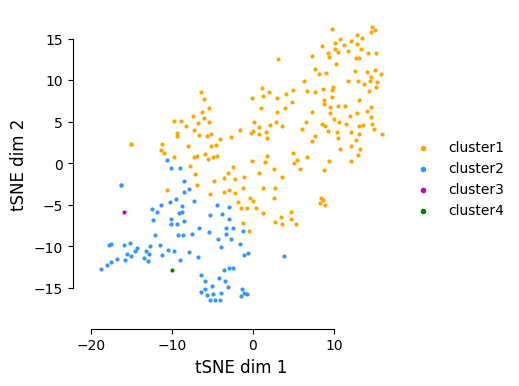

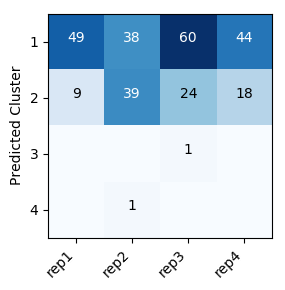

In [9]:
pred, pred_classes = read_labels('result/GM_Batch/GM_k4/cluster_assignments.txt')
cm = confusion_matrix(pred, ref)
y_pred = np.array(['cluster'+str(i+1) for i in pred])
plot_embedding(emb, y_pred,  cmap=['orange', '#3396FF', 'm', 'green'], markersize=4)

plot_confusion_matrix(cm, classes, pred_classes+1, figsize=(3,3), show_cbar=False)

## Figure S16d

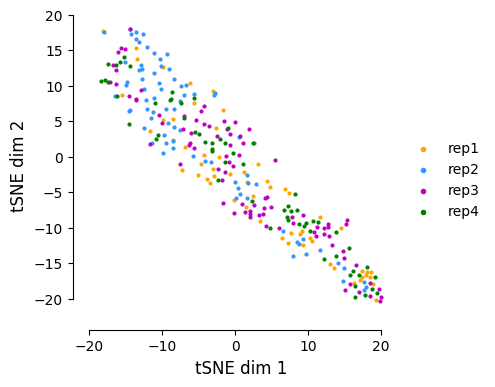

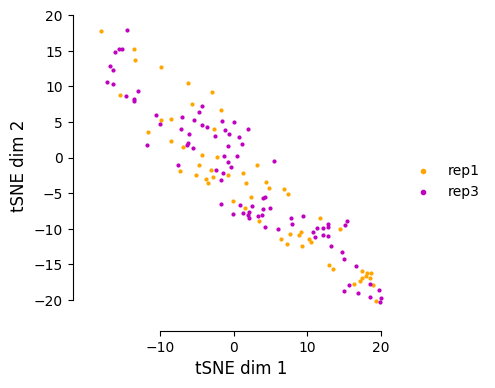

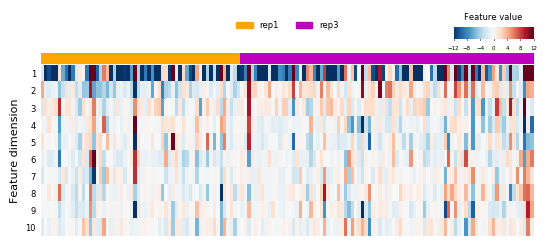

In [11]:
raw1 = raw.copy()
raw1[raw1>1] = 1

from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=124)
pca_feature = pca.fit_transform(raw1.T)

emb = plot_embedding(pca_feature, y, cmap=['orange', '#3396FF', 'm', 'green'], markersize=4, return_emb=True)
plot_embedding(pca_feature, y, classes=['rep1', 'rep3'],  markersize=4, cmap=['orange', 'm'])

plot_heatmap(pd.DataFrame(pca_feature[rep_1_3].T), y[rep_1_3], cmap='RdBu_r', row_cluster=False, 
             cax_title='Feature value', yticklabels=range(1, 11),  
             ylabel='Feature dimension', vmin=-12, vmax=12, figsize=(8, 3), colormap=['orange', 'm'], legend_font=6)

## Figure S16e

In [14]:
score_mat = mat_specificity_score(raw, y)

800


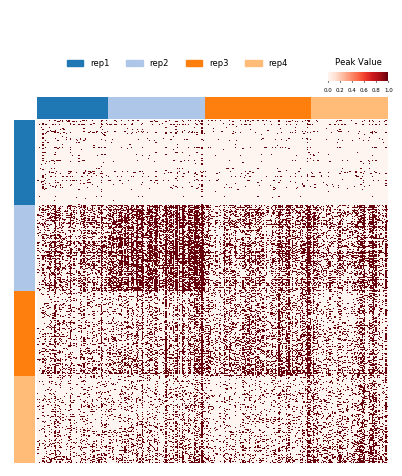

In [15]:
peak_index, peak_labels = cluster_specific(score_mat, top=200)
peak_labels = np.array(['rep'+str(i+1) for i in peak_labels])

plot_heatmap(raw.iloc[peak_index], y=y, classes=classes, row_labels=peak_labels, 
             ncol=4,cmap='Reds', vmax=1, row_cluster=False, legend_font=6, cax_title='Peak Value',
             figsize=(6, 6), bbox_to_anchor=(0.4, 1.2), position=(0.8, 0.76, 0.1, 0.015))